In [1]:
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [11]:
influence_pd=pd.read_csv('influence_data.csv')
artist_pd=pd.read_csv('data_by_artist.csv')
artist_pd=artist_pd.drop(['count'],axis=1)
artist_pd

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Natalie La Rose,3359519,0.830000,0.520000,0.735000,104.990000,-8.714000,1,0,0.000792,0.000013,0.065600,0.037600,189907.0000,64.000000
5850,Sarah Ross,3381566,0.721000,0.944000,0.626000,85.002000,-5.982000,1,8,0.013000,0.000000,0.320000,0.159000,262760.0000,52.000000
5851,Rotimi,3410250,0.637000,0.501000,0.431000,103.993000,-6.148000,0,0,0.229000,0.000059,0.099000,0.187000,185461.0000,71.000000
5852,Jillian Jacqueline,3455945,0.547000,0.672000,0.283000,155.791000,-5.023000,1,11,0.304000,0.000000,0.099600,0.049600,213133.0000,58.000000


In [3]:
for col in artist_pd.columns:
    if(col=='artist_name' or col=='artist_id'): continue
    artist_pd[col]=(artist_pd[col]-artist_pd[col].mean())/(artist_pd[col].std())


In [4]:
artist_pd

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,Frank Sinatra,792507,-1.190115,-1.608125,-0.903049,-0.530783,-1.032300,0.466387,-0.145898,1.329673,-0.477367,0.313171,-0.266496,-0.683091,-1.027357
1,Vladimir Horowitz,119107,-1.495436,-2.159715,-1.593802,-1.327897,-3.167002,0.466387,-1.282783,2.192502,3.199482,-0.102571,-0.349497,0.241506,-2.721444
2,Johnny Cash,816890,0.550895,-0.629824,0.676686,-0.277474,-0.391566,0.466387,1.275209,1.160069,-0.469695,0.400439,0.378488,-1.004600,-0.981267
3,Billie Holiday,79016,0.201939,-1.777754,-0.230727,-0.544842,-0.782237,0.466387,-0.145898,1.915865,-0.510730,0.189388,-0.096397,-0.731478,-1.812219
4,Bob Dylan,66915,-0.242246,-0.497676,0.033912,0.302711,-0.293765,0.466387,0.422545,0.742698,-0.420173,0.974941,-0.068488,0.124048,-0.660267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Natalie La Rose,3359519,2.105997,-0.302965,0.948008,-0.801601,0.297275,0.466387,-1.567004,-1.162463,-0.566617,-1.120228,-0.425934,-0.674402,1.844671
5850,Sarah Ross,3381566,1.299579,1.659521,0.403744,-1.844248,0.950920,0.466387,0.706766,-1.121062,-0.566670,1.069830,1.185136,0.196315,0.937610
5851,Rotimi,3410250,0.678120,-0.390906,-0.569940,-0.853608,0.911204,-2.143775,-1.567004,-0.388536,-0.566417,-0.832696,1.556717,-0.727539,2.373789
5852,Jillian Jacqueline,3455945,0.012271,0.400568,-1.308941,1.848365,1.180366,0.466387,1.559430,-0.134186,-0.566670,-0.827531,-0.266685,-0.396812,1.391140


In [12]:
influence_pd=pd.read_csv('influence_data.csv')
influence_pd

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [13]:
influence_pd1=influence_pd[['influencer_id','influencer_main_genre']]
influence_pd1.columns=['artist_id','genre']
influence_pd2=influence_pd[['follower_id','follower_main_genre']]
influence_pd2.columns=['artist_id','genre']
influence_pd1=pd.concat([influence_pd1,influence_pd2],axis=0)
influence_pd1=influence_pd1.groupby('artist_id').agg({
    'genre':'first'
})
influence_pd1

,genre
artist_id,
74,Pop/Rock
335,Pop/Rock
441,Pop/Rock
589,Pop/Rock
1097,Latin
...,...
3639618,Pop/Rock
3659356,Pop/Rock
3661296,Electronic


In [14]:
artist_pd=pd.merge(artist_pd,influence_pd1,on='artist_id',how='left')
artist_pd=artist_pd.dropna(how='any')
artist_pd=artist_pd.reset_index().drop(['index'],axis=1)

In [8]:
artist_pd

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,genre
0,Frank Sinatra,792507,-1.190115,-1.608125,-0.903049,-0.530783,-1.032300,0.466387,-0.145898,1.329673,-0.477367,0.313171,-0.266496,-0.683091,-1.027357,Vocal
1,Johnny Cash,816890,0.550895,-0.629824,0.676686,-0.277474,-0.391566,0.466387,1.275209,1.160069,-0.469695,0.400439,0.378488,-1.004600,-0.981267,Country
2,Billie Holiday,79016,0.201939,-1.777754,-0.230727,-0.544842,-0.782237,0.466387,-0.145898,1.915865,-0.510730,0.189388,-0.096397,-0.731478,-1.812219,Vocal
3,Bob Dylan,66915,-0.242246,-0.497676,0.033912,0.302711,-0.293765,0.466387,0.422545,0.742698,-0.420173,0.974941,-0.068488,0.124048,-0.660267,Pop/Rock
4,The Rolling Stones,894465,-0.154588,0.622342,0.550205,0.177757,0.508713,0.466387,-1.567004,-0.168818,0.187569,0.625993,-0.242268,-0.198737,-0.379600,Pop/Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,Natalie La Rose,3359519,2.105997,-0.302965,0.948008,-0.801601,0.297275,0.466387,-1.567004,-1.162463,-0.566617,-1.120228,-0.425934,-0.674402,1.844671,R&B;
5598,Sarah Ross,3381566,1.299579,1.659521,0.403744,-1.844248,0.950920,0.466387,0.706766,-1.121062,-0.566670,1.069830,1.185136,0.196315,0.937610,Country
5599,Rotimi,3410250,0.678120,-0.390906,-0.569940,-0.853608,0.911204,-2.143775,-1.567004,-0.388536,-0.566417,-0.832696,1.556717,-0.727539,2.373789,R&B;
5600,Jillian Jacqueline,3455945,0.012271,0.400568,-1.308941,1.848365,1.180366,0.466387,1.559430,-0.134186,-0.566670,-0.827531,-0.266685,-0.396812,1.391140,Country


In [16]:
df=artist_pd.drop(['artist_name','artist_id'],axis=1)
df=df.groupby('genre').mean()
df=df.drop('Unknown',axis=0).reset_index()
df.to_csv('genre_centroid.csv')
df

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,Avant-Garde,0.436633,0.287732,0.378875,107.410868,-19.853672,0.818182,5.272727,0.683018,0.503862,0.135397,0.056913,363882.562336,37.577925
1,Blues,0.577215,0.461617,0.654819,120.062338,-11.770419,0.841584,5.386139,0.562387,0.098301,0.192180,0.065746,228434.207693,28.269178
2,Children's,0.656753,0.395091,0.636239,114.170183,-11.412667,1.000000,4.250000,0.652342,0.003774,0.248331,0.088887,147479.478070,29.563258
3,Classical,0.331172,0.196692,0.221446,105.261931,-20.136714,0.857143,5.178571,0.887369,0.459814,0.166214,0.054642,306279.421450,26.420937
4,Comedy/Spoken,0.545914,0.604830,0.481060,109.068384,-12.799385,0.847826,5.086957,0.678532,0.031350,0.543248,0.547160,270483.569989,28.604364
5,Country,0.578411,0.528614,0.610675,122.294466,-9.988660,0.987593,5.878412,0.436965,0.041881,0.183429,0.046557,200973.699495,38.028052
6,Easy Listening,0.445687,0.373131,0.404793,112.448004,-13.784661,0.913043,4.956522,0.703010,0.533453,0.184470,0.051226,205241.843391,23.559840
7,Electronic,0.629134,0.674368,0.487384,120.546105,-9.149399,0.634615,6.144231,0.192836,0.350576,0.190660,0.079401,288691.826309,49.382905
8,Folk,0.517423,0.312672,0.502244,121.452807,-14.116680,0.926316,5.568421,0.730648,0.078451,0.189172,0.064531,213833.090992,28.662836
9,International,0.557788,0.465466,0.600071,115.124448,-12.144816,0.802469,5.358025,0.592237,0.143397,0.184600,0.074483,276871.929683,34.564024


In [85]:
def calr(df1,j):
    df2=df.loc[j].drop('genre')
    # print(df1)
    sx,sx2,sy,sy2,xy=0,0,0,0,0
    n=0
    for key,val in df1.iteritems():
        n+=1
        sx+=val
        sx2+=val*val
        sy+=df2[key]
        sy2+=df2[key]*df2[key]
        xy+=val*df2[key]
    r=(n*xy-sx*sy)/(math.sqrt(n*sx2-sx*sx)*math.sqrt(n*sy2-sy*sy))
    return r
genre_to_num={}
num_to_genre={}
for i in range(len(df)):
    genre_to_num[df.loc[i].genre]=len(genre_to_num)
    num_to_genre[genre_to_num[df.loc[i].genre]]=df.loc[i].genre

m=len(genre_to_num)
r=[[0 for i in range(m)] for i in range(m)]
for i in range(len(artist_pd)):
    if(artist_pd.loc[i].genre=='Unknown'): continue
    tmp=artist_pd.loc[i].drop(['artist_name','artist_id','genre'])
    for j in range(m):
        t=calr(tmp,j)
        r[genre_to_num[artist_pd.loc[i].genre]][j]+=calr(tmp,j)

In [151]:
rp=np.array(r)
for i in range(len(rp)):
    rp[i]=(rp[i]-rp[i].min())/(rp[i].max()-rp[i].min())

array([[1.        , 0.73295976, 0.61261378, 0.96725958, 0.4989725 ,
        0.41018122, 0.95880234, 0.47919576, 0.8550734 , 0.84369176,
        0.99078987, 0.35709898, 0.97312124, 0.        , 0.20945917,
        0.32653592, 0.26391702, 0.93702421, 0.79347213],
       [0.64200964, 1.        , 0.91530284, 0.61976983, 0.42074507,
        0.90674779, 0.57275705, 0.08512588, 0.8691309 , 0.9357134 ,
        0.71576353, 0.87686145, 0.53323738, 0.        , 0.66004617,
        0.58701588, 0.33361038, 0.5240458 , 0.79936481],
       [0.59893692, 0.92978388, 1.        , 0.61107061, 0.59846042,
        0.84334877, 0.53741163, 0.16059003, 0.86592992, 0.8998148 ,
        0.67021153, 0.81806483, 0.50904239, 0.        , 0.74088668,
        0.65761022, 0.52872492, 0.51462986, 0.85076805],
       [0.96036466, 0.66832378, 0.58274649, 1.        , 0.55941233,
        0.33543733, 0.9667197 , 0.31304317, 0.87058862, 0.8176616 ,
        0.94354442, 0.25886922, 0.96785785, 0.        , 0.05430462,
        0.134

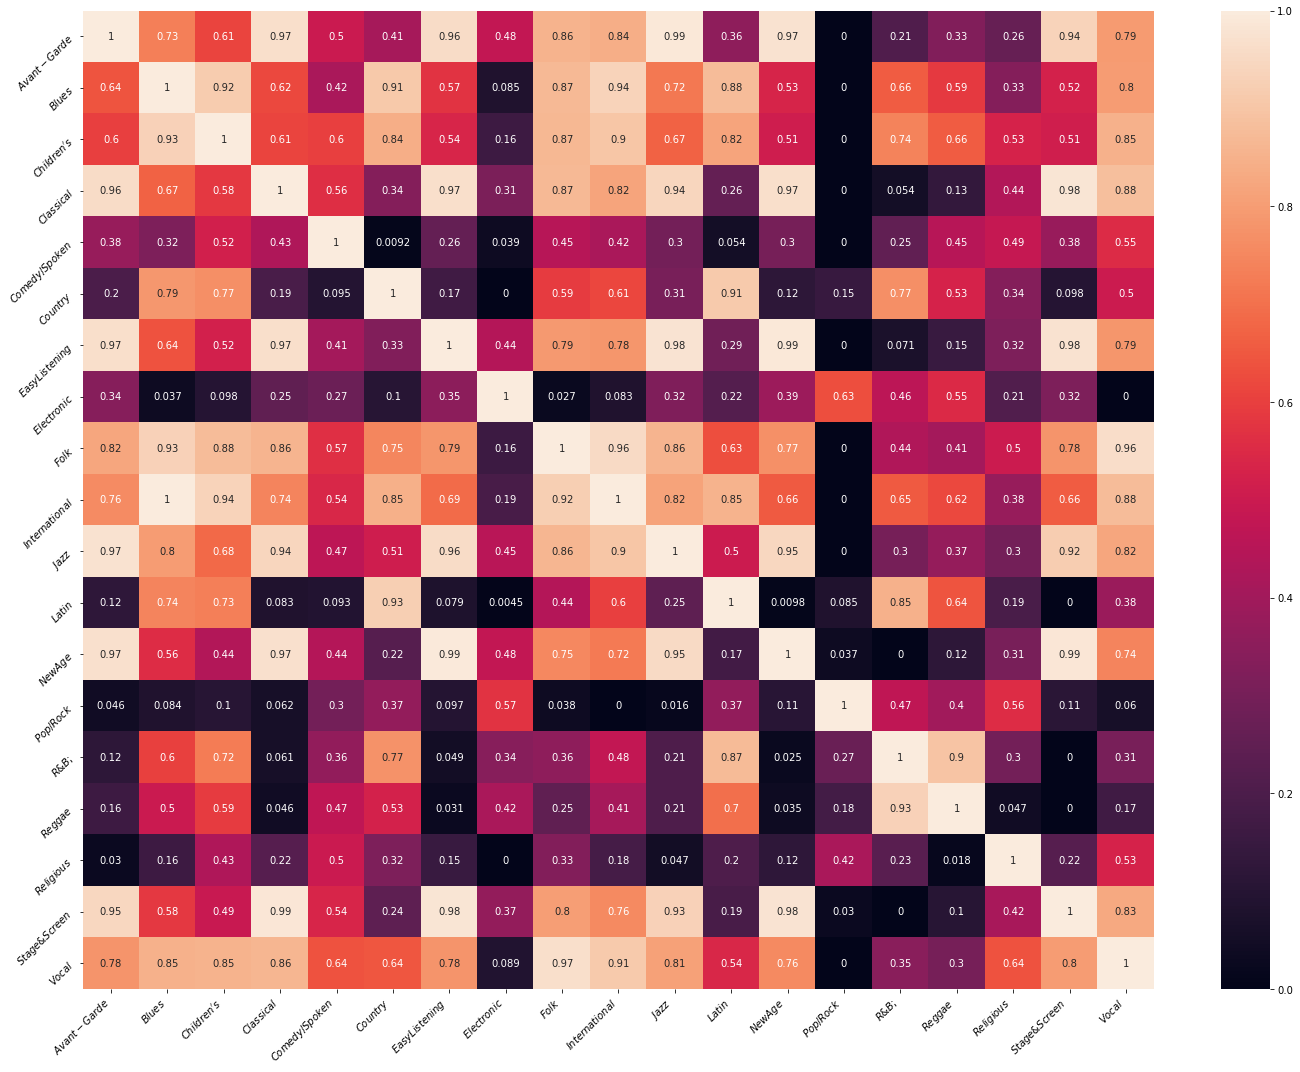

In [174]:
ticks=["$"+df.loc[i]['genre']+"$" for i in range(m)]
pos=[i+0.5 for i in range(m)]
plt.figure(figsize=(24,18))
sns.heatmap(rp,annot=True)
plt.xticks(pos,ticks,rotation=45, horizontalalignment='right')
plt.yticks(pos,ticks,rotation=45, horizontalalignment='right')
plt.savefig('热力图.jpg')